In [1]:
import numpy as np
import pandas as pd
import matplotlib.cm as cm
from matplotlib import pyplot as plt

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
df = pd.read_csv('kmeans.csv')
df.head()

,x1,x2
0,2.072345,-3.241693
1,17.936710,15.784810
2,1.083576,7.319176
3,11.120670,14.406780
4,23.711550,2.557729


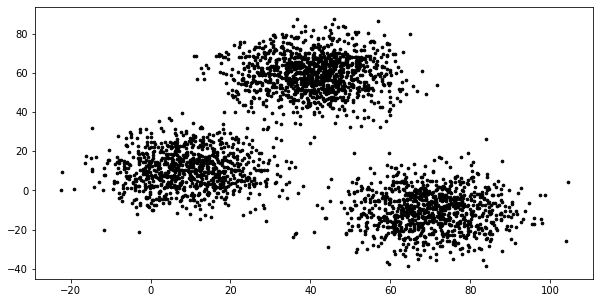

In [4]:
x1 = df['x1'].values
x2 = df['x2'].values
plt.rcParams['figure.figsize'] = (10, 5)
plt.scatter(x1, x2, c='k', s = 7) 

## I. K-means Clustering
### K-means Clustering Algorithm with below conditions

> a. Initialize cluster centers randomly  
> b. Use Euclidean distance  
> c. Converge condition : previous cluster centers == current cluster centers  

- Visualize cluster labels and centers for different $k$ values where $k = 2,3,6,10$   
- Compute cluster heterogeneities for each $k$ 
- Plot heterogeneity over k

In [5]:
class kmeans:
    
    def __init__(self, x1, x2, k):
        
        self.x1 = x1
        self.x2 = x2
        self.k = k
        self.X = np.array(list(zip(x1, x2)))

        
    def EuclideanDistance(self, a, b, ax = 1):
        
        distance = np.linalg.norm(a-b, axis=ax)
        return distance
    

    def clustering(self):
        
        np.random.seed(0)
        
        C_x = np.random.randint(0, np.max(self.x1)-np.mean(self.x1), size=self.k)
        C_y = np.random.randint(0, np.max(self.x2)-np.mean(self.x2), size=self.k)
        self.C = np.array(list(zip(C_x, C_y)), dtype=np.float32)
        
        self.cluster_labels = np.zeros(len(self.X))
        
        while True:
            for i in range(len(self.cluster_labels)):
                self.cluster_labels[i] = np.argsort(self.EuclideanDistance(self.X[i], self.C))[0]
            temp_C = self.C.copy()
            for i in range(len(temp_C)):
                temp_C[i] = np.mean(self.X[np.where(self.cluster_labels==i)[0]], axis=0)
            if np.array_equal(self.C, temp_C): break
            else: self.C = temp_C
        
        return self.X, self.cluster_labels, self.C

       
    def cluster_heterogeneity(self):
        
        heterogeneity = 0
        for i in range(self.k):
            temp_X = self.X[self.cluster_labels==i]
            heterogeneity += np.sum(np.power(temp_X-self.C[i], 2))
        
        return heterogeneity


def plot_data(X, cluster_labels, C, k):
    
    colors = cm.rainbow(np.linspace(0, 1, k))
    fig = plt.figure(figsize=(10,5))
    
    for i in range(k):
        temp_X = X[cluster_labels==i]
        plt.scatter(temp_X[:,0], temp_X[:,1], s=1)
    plt.scatter(C[:,0], C[:,1], marker='*', color='k', s=700)
    
    return plt

In [6]:
k = 15

In [7]:
model = kmeans(x1, x2, k)

In [8]:
X, cluster_labels, C = model.clustering()

- When k=2

In [9]:
k =2 
model = kmeans(x1, x2, k)
X, cluster_labels, C = model.clustering()

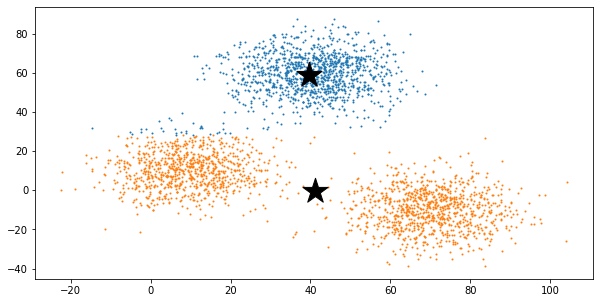

In [10]:
fig = plot_data(X, cluster_labels, C, k)

> Compute cluster_heterogeneity when k=2

In [11]:
hetero_k2 = model.cluster_heterogeneity()
print(hetero_k2)

2491124.0776897976


- When k=3

In [12]:
k = 3
model = kmeans(x1, x2, k)
X, cluster_labels, C = model.clustering()

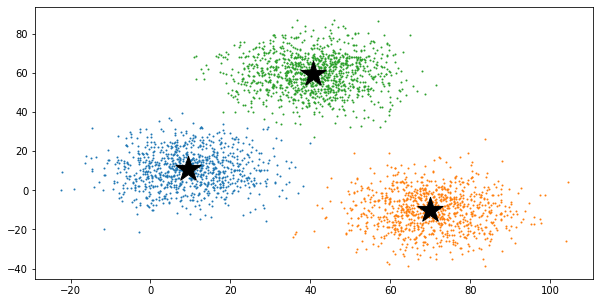

In [13]:
fig = plot_data(X, cluster_labels, C, k)

> Compute cluster_heterogeneity when k=3

In [14]:
hetero_k3 = model.cluster_heterogeneity()
print(hetero_k3)

611605.880693394


- When k=6

In [15]:
k = 6
model = kmeans(x1, x2, k)
X, cluster_labels, C = model.clustering()

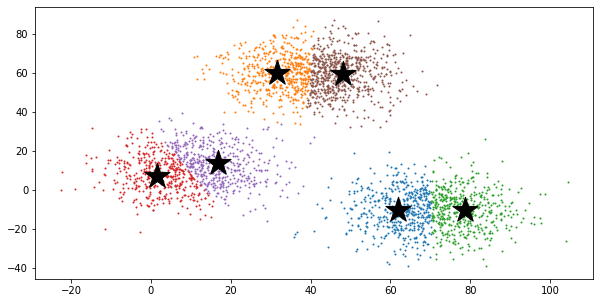

In [16]:
fig = plot_data(X, cluster_labels, C, k)

> Compute cluster_heterogeneity when k=6

In [17]:
hetero_k6 = model.cluster_heterogeneity()
print(hetero_k6)

407726.7783443968


- When k=10

In [18]:
k = 10
model = kmeans(x1, x2, k)
X, cluster_labels, C = model.clustering()

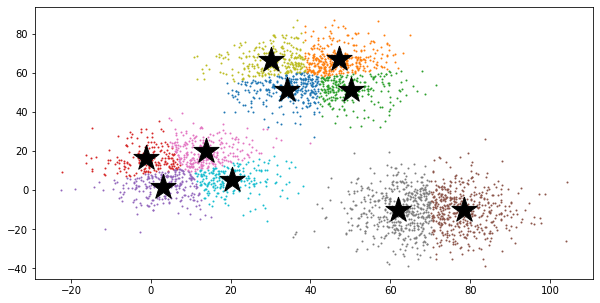

In [19]:
fig = plot_data(X, cluster_labels, C, k)

> Compute cluster_heterogeneity when k=10

In [20]:
hetero_k10 = model.cluster_heterogeneity()
print(hetero_k10)

282260.8908868919


Text(0, 0.5, 'Heterogeneity')

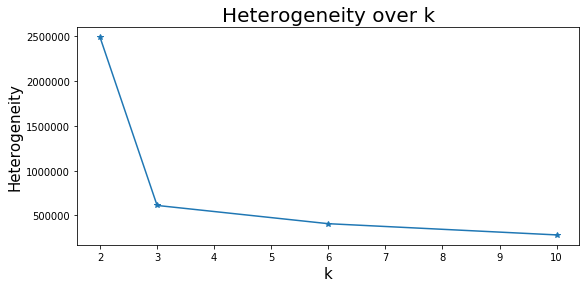

In [21]:
k_list = [2, 3, 6, 10]
hetero = [hetero_k2, hetero_k3, hetero_k6, hetero_k10]

plt.figure(figsize=(9,4))
plt.plot(k_list, hetero, marker= '*')
plt.title('Heterogeneity over k', fontsize=20)
plt.xlabel('k', fontsize=15)
plt.ylabel('Heterogeneity', fontsize=15)